<a href="https://colab.research.google.com/github/rashikapr/Class-117-TnS-A-/blob/main/Class_117_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
df=pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
from sklearn.model_selection import train_test_split
factors=df[["age","sex","cp","chol","thal"]]
heart_attack=df["target"]

factors_train,factors_test,heart_attack_train,heart_attack_test=train_test_split(factors,heart_attack,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
factors_train=sc_x.fit_transform(factors_train)
factors_test=sc_x.transform(factors_test)

In [6]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(factors_train,heart_attack_train)

LogisticRegression(random_state=0)

In [7]:
heart_attack_prediction=classifier.predict(factors_test)

predicted_values=[]

for i in heart_attack_prediction:
  if i==0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values=[]

for i in heart_attack_test.ravel():
  if i==0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

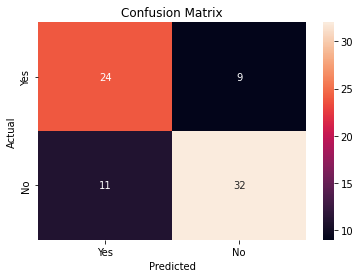

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Yes", "No"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)